In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [13]:
df_anomaly = pd.read_csv('csv_files/train.csv')

anomaly_inputs = ['request_freq', 'avg_tokens', 'longest_consec', 'var_score']

model_if = IsolationForest(contamination=0.002, random_state=42)
model_if.fit(df_anomaly[anomaly_inputs])

c:\Users\vhage\Documents\Skolarbete\Exjobb\request-analyzer-model\.venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.002, random_state=42)

In [14]:
df_anomaly['anomaly_score'] = model_if.decision_function(df_anomaly[anomaly_inputs])
df_anomaly['anomaly'] = model_if.predict(df_anomaly[anomaly_inputs])

#This dataframe will only include anomaly score and anomaly label
df_anomaly_score = df_anomaly.loc[:,['anomaly_score', 'anomaly']]
df_anomaly_score['user'] = df_anomaly['user']
df_anomaly_score.loc[df_anomaly_score['anomaly']==-1] 

,anomaly_score,anomaly,user
0,-0.103145,-1,user-1005
1,-0.061021,-1,user-1004
2,-0.074581,-1,user-1005
3,-0.076809,-1,user-1005
4,-0.094487,-1,user-1005


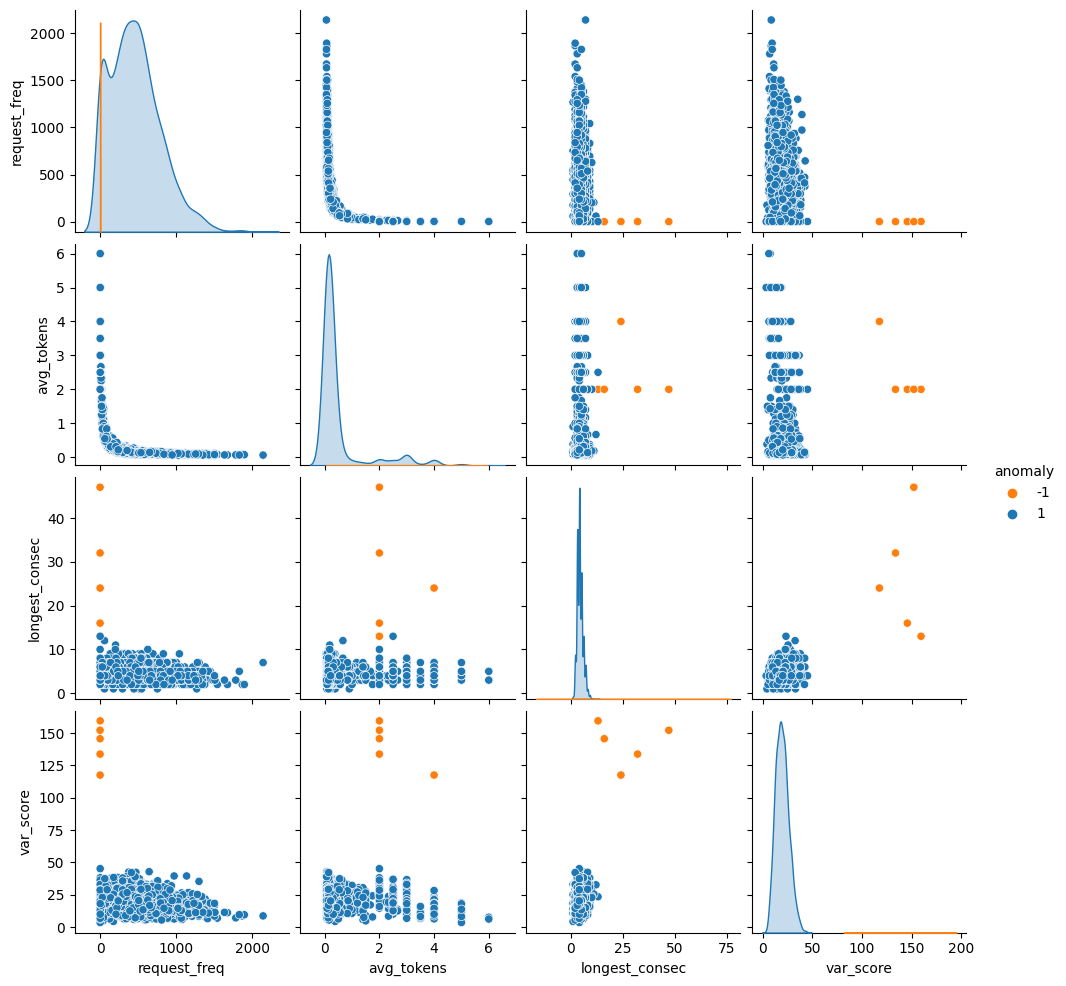

In [15]:
#Plots showcasing the outliers detected by isolation forest
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_anomaly, vars=anomaly_inputs, hue='anomaly', palette=palette)